In [8]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from obspy.core.event import Catalog


# Read and create dictionary

In [26]:

directory = os.fsencode('flegrei_2014_2023_GOSSIP')
print('reading and saving:')
cat_all={}
for file in os.listdir(directory):
    filename = os.fsdecode(file)

    if filename.endswith(".csv"): 
        print(filename)

        with open('flegrei_2014_2023_GOSSIP/'+filename, newline='') as f:
            first_line=True
            reader = csv.reader(f, delimiter=',')
            cat={}
            for row in reader:
                if first_line==True:
                    first_line=False
                    for key in row:
                        cat.setdefault(key,[])
                        cat_all.setdefault(key,[])
                else:
                        for n,key in enumerate(cat):
                             cat[key].append(row[n])
                             cat_all[key].append(row[n])

        del cat['Area']
        del cat['Type']
        del cat_all['Area']
        del cat_all['Type']

        for index,id_number in enumerate(cat['#EventID']):
            cat['#EventID'][index]  =   int(cat['#EventID'][index])
            try:
                cat['Latitude'][index]  =   float(cat['Latitude'][index])
            except:
                None
            try:
                cat['Longitude'][index] =   float(cat['Longitude'][index])
            except:
                None
            try:
                cat['Depth/km'][index]  =   float(cat['Depth/km'][index])
            except:
                None
            try:
                cat['Magnitude'][index]  =  float(cat['Magnitude'][index])
            except:
                None
            try:
                cat['MagErr'][index]  =     float(cat['MagErr'][index])
            except:
                None            
        #save
        np.save('flegrei_2014_2023_GOSSIP/'+ filename[:-4] +'.npy', cat)
    else:
        continue


for index,id_number in enumerate(cat['#EventID']):
    cat_all['#EventID'][index]  =   int(cat_all['#EventID'][index])
    try:
        cat_all['Latitude'][index]  =   float(cat_all['Latitude'][index])
    except:
        None
    try:
        cat_all['Longitude'][index] =   float(cat_all['Longitude'][index])
    except:
        None
    try:
        cat_all['Depth/km'][index]  =   float(cat_all['Depth/km'][index])
    except:
        None
    try:
        cat_all['Magnitude'][index]  =  float(cat_all['Magnitude'][index])
    except:
        None
    try:
        cat_all['MagErr'][index]  =     float(cat_all['MagErr'][index])
    except:
        None
#save
np.save('flegrei_2014_2023_GOSSIP/events_all.npy', cat_all)
print('events_all')

reading and saving:
events_2017.csv
events_2016.csv
events_2014.csv
events_2015.csv
events_2018.csv
events_2019.csv
events_2022.csv
events_2023.csv
events_2021.csv
events_2020.csv
events_all


## load all dictionaries

In [3]:
print('loading dictionaries:')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    
    if filename.endswith(".npy"): 
        print(filename)

        var_name='cat' + filename[6:-4]
        cat=np.load('flegrei_2014_2023_GOSSIP/'+ filename , allow_pickle='TRUE').item()
        exec(f"{var_name} = {cat}")
        
    else:
        continue

loading dictionaries:
events_2014.npy
events_2015.npy
events_2017.npy
events_2016.npy
events_2018.npy
events_2019.npy
events_2021.npy
events_2020.npy
events_2022.npy
events_2023.npy
events_all.npy


## load big dictionary (catalogue)

In [4]:
cat_all=np.load('flegrei_2014_2023_GOSSIP/events_all.npy' , allow_pickle='TRUE').item()

# CODE

In [5]:
print(type(cat_all))
print(cat_all.keys())
print(len(cat_all['Longitude']))


<class 'dict'>
dict_keys(['#EventID', 'Time', 'Latitude', 'Longitude', 'Depth/km', 'MagType', 'Magnitude', 'MagErr', 'Level'])
15178


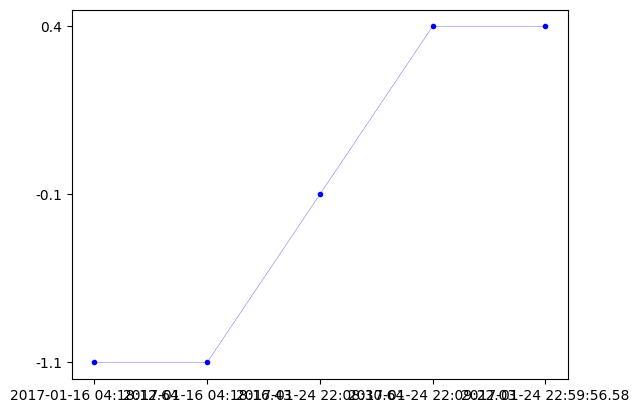

In [6]:
plt.figure()
y=cat_all['Magnitude'][0:5]
x=cat_all['Time'][0:5]
plt.plot(x,y,'.-b',linewidth=0.2)


In [7]:
print(cat_all.keys())
print(cat_all['#EventID'][1],',',cat_all['Time'][1],',',cat_all['Latitude'][1],',',cat_all['Longitude'][1],',',cat_all['Depth/km'][1],',',cat_all['MagType'][1],',',cat_all['Magnitude'][1],',',cat_all['MagErr'][1],',',cat_all['Level'][1])

dict_keys(['#EventID', 'Time', 'Latitude', 'Longitude', 'Depth/km', 'MagType', 'Magnitude', 'MagErr', 'Level'])
8499 , 2017-01-16 04:18:16.43 ,  ,  ,  , D , -1.1 , 0.3 , Bollettino


## create two catalogues: 1) only magnitudes ; 2) magnitudes and location

In [ ]:
cat_mag=dict.fromkeys(cat_all.keys(),[])
cat_loc=dict.fromkeys(cat_all.keys(),[])

for n,ev_id in enumerate(cat_all['#EventID']):
    if ( cat_all['Latitude'][n]=='' and cat_all['MagType'][n]=='' ):
        continue
    elif ( cat_all['Latitude'][n]=='' and cat_all['MagType'][n]!='' ):
        for key in cat_mag:
            cat_mag[key][n].append(cat_all[key][n])
    elif ( cat_all['Latitude'][n]!='' and cat_all['MagType'][n]!='' ):
        for key in cat_loc:
            cat_loc[key][n].append(cat_all[key][n])
    else:
        print('event not included in catalogue')

# create catalogue obspy

In [24]:
cat_obs=Catalog(cat_all['#EventID'])
cat_obs

AttributeError: 'int' object has no attribute 'short_str'